# Лабораторная работа №6. Решение задачи Коши
### Выполнила: Пьянова Александра

Целью данной работы является решение следующего дифференциального уравнения при заданных начальных условиях:

$$\begin{gather}
5y''+8y'+4y=x\cdot e^{-x} \\
y(0)=1, \quad y'(0)=0, \quad x\in[0,2] \ \label{eq:Xi} \\ 
\end{gather}$$

In [1]:
import matplotlib.pylab
from pylab import *
from numpy.linalg import *
from scipy.integrate import ode

## Аналитическое решение дифференциального уравнения

Уравнение является линейным неоднородным дифференциальным уравнением второго порядка и не сложно решается аналитически. Делать этого вручную мне не хочется, поэтому для аналитического решения использовался Wolfram Alpha.

Решением этого уравнения  будет являться:

$$
y(x) = \frac{1}{2} \exp (-x) \left(\exp \left(\frac{x}{5}\right) \sin \left(\frac{2
   x}{5}\right)-2 \exp \left(\frac{x}{5}\right) \cos \left(\frac{2 x}{5}\right)+2
   x+4\right)
$$


Для построения фазового портрета нам понадобится производная по x:

$$\frac{dy}{dx}=\exp (-x) \left(\exp \left(\frac{x}{5}\right) \cos \left(\frac{2x}{5}\right)-x-1\right)$$


In [2]:
def YY(x):
    return exp(-x)*(-1 - x + cos((2*x)/5.)*exp(x/5.))
        
def Y(x):
    return (exp(-x)*(4 + 2*x - 2*cos((2*x)/5.)*exp(x/5.) + exp(x/5.)*sin((2*x)/5.)))/2.

class wolfram():
    x=arange(0,2,0.01*2)
    x=x+0.03
    y=Y(x)
    yy=YY(x)

In [26]:


# plot(wolfram.x,wolfram.y)
# xlabel('x')
# ylabel('y')
# show()

# plot(wolfram.y,wolfram.yy)
# xlabel('y')
# ylabel('y`')
# show()

# #plot(wolfram.yy,wolfram.x)
# #show()

## Решение ДУ численно, разностным методом по неявной симметричной схеме

Рассмотрим наше ДУ, переписав его в виде системы (введя обозначения $z=y'$):

$$
\begin{cases} 
y'+(-z)=0\\
z'+(\frac85z+\frac45y)=\frac15xe^{-x}
\end{cases}
$$

Каноническая модельная задача для разностной схемы записывается в виде

$$
\begin{cases} 
u'+A(x)u=\varphi(x), \quad x>0\\
u(0)=u0
\end{cases}
$$

где $\phi(x), u$ - вектора размерности порядка уравнения $s$, а $A(x)$ - матрица $x\times s$. Для нашего ураванения нетрудно видеть, что 

$$
u=\begin{bmatrix} 
y\\z
\end{bmatrix},
\quad
\varphi=\begin{bmatrix} 
0\\\frac15xe^{-x}
\end{bmatrix},
\quad
A=\begin{bmatrix} 
0 & -1\\
\frac45 & \frac85
\end{bmatrix}.
$$

Решение задачи Коши **симметричной неявной схемой** осуществляется решением относительно $y_{n+1}$ на каждом шаге ($n$) СЛАУ:

$$
\begin{cases}
\frac{y_{n+1}-y_{n}}{h}+\frac12 A(y_n+y_{n+1})=\varphi_n\\
n=0,1,2,...,\,\,y_0=u_0
\end{cases}
$$

Перепишем СЛАУ в виде "$Mx=N$":

$$
(E+\frac12hA)y_{n+1}=h\varphi_n+y_n-\frac12hAy_n
$$

In [11]:
def phi(x):
    return array([0,1/5*x*exp(-x)])

# В нашем ДУ получилось так, что A не зависит от x, поэтому без функции A(x) можно обойтись
A=array([[0,-1],[4/5,8/5]])
E=np.identity(2)

xmin,xmax=0,2
h=(xmax-xmin)/2

def solver(h):
    current_x=xmin 
    current_y=[1,0] # начальные условия

    x,y,yy=np.array([current_x]),np.array([current_y[0]]),np.array([current_y[1]]) # массивы куда запишем ход решения

    while (current_x<xmax):     
        M=E+1/2*h*A
        N=h*phi(current_x)+current_y-1/2*h*np.dot(A,current_y)

        current_y=solve(M,N)

        x=np.append(x,current_x)
        y=np.append(y,current_y[0])
        yy=np.append(yy,current_y[1])

        current_x+=h
    return x,y,yy

h=(xmax-xmin)/2
# def err(h):
#     return np.linalg.norm(solver(h)[2]-solver(h/2)[2][0::2])/np.linalg.norm(solver(h/2)[2][0::2])

eps=0.01
while np.linalg.norm(Y(solver(h)[0])-solver(h)[1])/np.linalg.norm(solver(h)[1])>eps:
    h=h/2
print(h)
x,y,yy=solver(h)

0.015625


## Решение ДУ численно встроенными функциями SciPy

In [19]:
from scipy.integrate import odeint,solve_ivp

def model(x,yarr):
	y=yarr[0]
	z=yarr[1]
	return [z,1/5*(x*exp(-x)-8*z-4*y)]

sols=solve_ivp(model,[0, 2],[1,0],method='LSODA',min_step=h,max_step=h)

x2=sols.t
y2=sols.y[0]
yy2=sols.y[1]

Чтобы убедиться в том, что погрешность действительно мала, ниже представлены 
графики зависимости y(x) и фазовые траектории для всех трех наших решений уравнений.

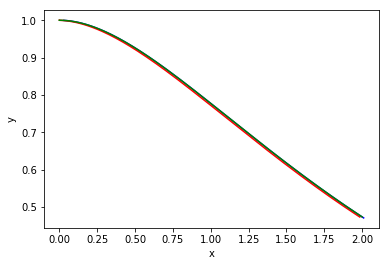

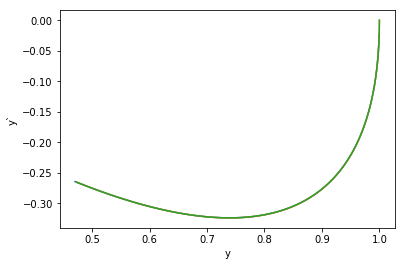

In [20]:
plot(wolfram.x,wolfram.y,'blue')
plot(x,y,'red')
plot(x2,y2,'green')
xlabel('x')
ylabel('y')
show()

plot(wolfram.y,wolfram.yy)
plot(y,yy)
plot(y2,yy2)
xlabel('y')
ylabel('y`')
show()

Теперь мы можем сравнить наши решения. В блоке ниже представлены разности двух методов  с истинным решением. Видно, что точность 
SciPy  превосходит выбранный нами метод.  

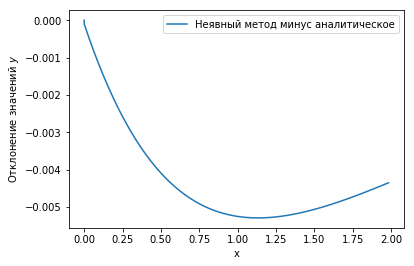

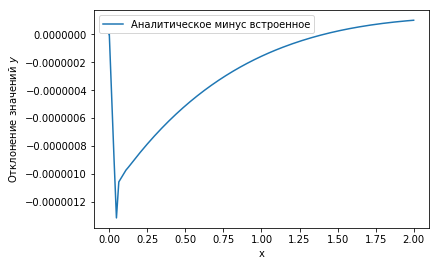

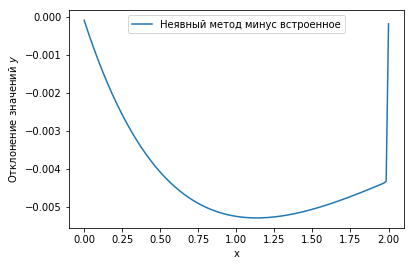

In [29]:
plot(x,y-Y(x),label='Неявный метод минус аналитическое')
ylabel('Отклонение значений $y$')
xlabel('x')
legend()
show()

plot(x2,Y(x2)-y2,label='Аналитическое минус встроенное')
ylabel('Отклонение значений $y$')
xlabel('x')
legend()
show()

delta=np.interp(x2, x, y)-np.interp(x2, x2, y2)
plot(x2,delta,label='Неявный метод минус встроенное')
ylabel('Отклонение значений $y$')
xlabel('x')
legend()
show()

## Вывод
В результате выполнения работы была решена задача Коши для заданного дифференциального уравнения тремя разными способами: численно, с помощью Wolfram Alfa и с помощью модуля SciPy. Решение произвено разностным методом на разбиении с шагом 0.015625 и дает относительную точность решения 0.01.